In [1]:
"""This code takes some time to run due to the high number of sampled data points
Decrease T = 1000000 for quicker but less accurate empirical PDF
or reduce the number of eval_points from 1000 e.g. to 100"""

#importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

import matplotlib as mpl
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble=r'\usepackage{amsmath}')

#getting current directory
import os
cwd = os.getcwd()

#importing all the functions contained in "functions.py"
%run ../functions

In [2]:
#time lengths
delta_t = 0.3 
T = 1000000

#define parameters of the two-state model
V = np.array([2000, -1500])
Lambda = np.array([1, 0.5])*5
P = np.array([[0.0, 1], [1, 0.0]])
sigma = 50
n = Lambda.shape[0]

#running the model
x_sim, y_sim, t_sim, sw, st = n_state_model(delta_t, T, V, Lambda, P, sigma)

#constructing the increments
delta_y = np.array([y_sim[i]-y_sim[i-1] for i in range(1, len(y_sim))])

#define points for which we need the PDF approximation    
eval_points = np.linspace(np.min(delta_y), np.max(delta_y), 1000)

#compute the kernel density
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(delta_y[:, None])
# score_samples returns the log of the PDF
logPDF = kde.score_samples(eval_points[:, None])
PDF = np.exp(logPDF)

#compute the PDF approximation - up-to-one-switch
approx_pdf_res = approx_pdf_up_to_1_switch(V, Lambda, P, sigma, delta_t, eval_points)

#compute the PDF approximation - up-to-two-switch
approx_pdf_res_2 = approx_pdf_up_to_2_switch(V, Lambda, P, sigma, delta_t, eval_points)

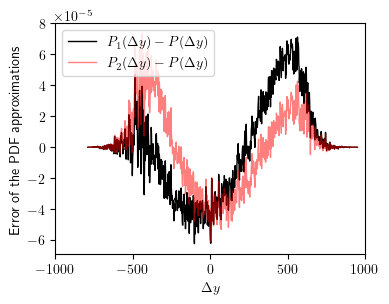

In [4]:
plt.figure(figsize=(4,3))
plt.plot(eval_points, approx_pdf_res-PDF, color='black', linewidth=1, label=r'$P_1(\Delta y)-P(\Delta y)$')
plt.plot(eval_points, approx_pdf_res_2-PDF, color='red', linewidth=1, alpha=0.5, label=r'$P_2(\Delta y)-P(\Delta y)$')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel(r'$\Delta y$')
plt.ylabel(r'Error of the PDF approximations')
plt.xlim([-1000,1000])
plt.legend()
plt.savefig("PDF_error_comparison_2_ratesx5.png", format="png", dpi=1200, bbox_inches="tight") 